## Библиотеки

За овој проект ни се потребни библиотеките tsfresh (за анализа на податоците), networkx (за креирање на мрежа на поврзаност),
pandas (за манипулација на податоците) и matplotlib (за визуелизација)

In [27]:
%pip install tsfresh
%pip install networkx
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from tsfresh import extract_features
import networkx as nx

Државите одбрани за анализа се Шведска (Европа), Австралија(Австралија) и Канада(Северна Америка)

In [3]:
countries = ["Sweden",
             "Australia",
             "Canada"]

## Анализа

Ги вчитуваме податоците и ги филтрираме според државите што ги одбравме. Филтрирање по години нема потреба зошто го имаме веќе потребниот опсег (2018-2022)

In [4]:
df = pd.read_csv("Food Prices.csv")
df = df[(df['Country '] == countries[0]) | 
        (df['Country '] == countries[1]) | 
        (df['Country '] == countries[2])]
df

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High
...,...,...,...,...,...,...,...,...,...,...
1195,Canada,2022,8,Potatoes,1 Kg,3.17,CAD,2.41,1,High
1196,Canada,2022,9,Potatoes,1 Kg,3.18,CAD,2.42,1,High
1197,Canada,2022,10,Potatoes,1 Kg,3.20,CAD,2.43,1,High
1198,Canada,2022,11,Potatoes,1 Kg,3.21,CAD,2.44,1,High


Увидуваме дека успешно е филтриран dataframe-от

In [14]:
df['Country '].unique()

array(['Australia', 'Sweden', 'Canada'], dtype=object)

Правиме нова колона Date, која е спој од колоната Year и Month, за да можеме полесно правиме временски филтри

In [5]:
df['Date'] = pd.to_datetime(df['Year '].astype(str) + '-' + df['Month '].astype(str), format='%Y-%m')
df

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality,Date
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High,2018-01-01
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High,2018-02-01
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High,2018-03-01
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High,2018-04-01
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...
1195,Canada,2022,8,Potatoes,1 Kg,3.17,CAD,2.41,1,High,2022-08-01
1196,Canada,2022,9,Potatoes,1 Kg,3.18,CAD,2.42,1,High,2022-09-01
1197,Canada,2022,10,Potatoes,1 Kg,3.20,CAD,2.43,1,High,2022-10-01
1198,Canada,2022,11,Potatoes,1 Kg,3.21,CAD,2.44,1,High,2022-11-01


Ги отстрануваме сега непотребните колони

In [6]:
df.drop(["Year ","Month "], axis="columns", inplace=True)

Ги анализираме нумеричките податоци како што се просечната цена и цената во американски долари за секоја држава. Податоците ги сортираме според новокреираната Date колона

In [10]:
extracted_features = extract_features(df[['Country ','Date','Average Price ','Price in USD']],
                                      column_id="Country ", column_sort="Date")

Feature Extraction:   0%|          | 0/6 [00:00<?, ?it/s]

Feature Extraction: 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]


Го острануваме лимитот за да ги видиме сите колони

In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Го транспонираме dataframe-от за подобра прегледност

* Просечната цена:
    
    - variance_larger_than_standard_deviation - Оваа карактеристика ни укажува дали има големи разлики помеѓу податоците.
    За Австралија и Шведска ова е точно додека за Канада не е.
    - has_duplicate_max - Дали се повтара како вредност максимумот. Не е точно за ниту една држава
    - has_duplicate_min - Дали се повтара како вредност максимумот. Не е точно за ниту една држава
    - has_duplicate - Дали просечната цена се повтара. Точно е за сите држави.
    - sum_values - Ја дава сумата на сите просечни цени во дадениот опсег за секоја држава.
    - abs_energy - Ја дава апсолутната енергија односно вкупната сума на сите вредности на квадрат
    - mean_abs_change - Апсолутната просечната промена помеѓу две последователни вредности
    - mean_change - Просечната промена помеѓу две последователни вредности
    - mean_second_derivative_central - Ја враќа просечната вредност од централна апроксимација од втор извод
    - median - среден цел број
    - mean - просек
    - length - големината на датасетот
    - standard_deviation - стандардна девијација која покажува колку се распределени податоците релативно спрема просекот
    - variation_coefficient - Коефициент на варијација. Дава релативна варијација околу просекот
    - variance - распределба на податочните точки
    - skewness - мерка за асиметријата на распределбата на веројатноста
    - kurtosis - мерка за „опашноста“ на распределбата
    - root_mean_square - Корен од просекот на квадрат
    - absolute_sum_of_changes - Кумулативна сума на апсолутни последователни промени  
    - longest_strike_below_mean - Должината на најголемата секвенца каде секој елемент е под просекот
    - longest_strike_above_mean - Должината на најголемата секвенца каде секој елемент е над просекот
    - count_above_mean - Број на елементи над просекот
    - count_below_mean - Број на елементи под просекот
    - last_location_of_maximum - Индексот на последниот максимум
    - first_location_of_maximum - Индексот на првиот максимум
    - last_location_of_minimum - Индексот на последниот минимум
    - first_location_of_minimum - Индексот на првиот минимум
    - percentage_of_reoccurring_values_to_all_values - Процентот на вредности кои се појавуваат повеќе од еднаш
    - percentage_of_reoccurring_datapoints_to_all_datapoints - Истото
    - sum_of_reoccurring_values - Сумата на вредности кои се повторуваат
    - sum_of_reoccurring_data_points - Истото
    - ratio_value_number_to_time_series_length - Фактор кој дава 1 доколку сите вредности се уникатни, инаку е помало од 1
    - sample_entropy - Вредноста за ентропијата на податоците. 
    - maximum - Најголемата вредност
    - absolute_maximum - Апсолутната најголема вредност
    - minimum - Најмалата вредност
    - benford_correlation - Дава дистрибуција на релативната честота за првата цифра за секој елемент
    - time_reversal_asymmetry_statistic__lag_1 - симетричноста на податоците, каде lag е големината на прозорецот што треба да се земе 
    - time_reversal_asymmetry_statistic__lag_2 -
    - time_reversal_asymmetry_statistic__lag_3 -
    - c3__lag_1 - статистика за мерење на нелинеарност
    - c3__lag_2 -
    - c3__lag_3 -
    - cid_ce__normalize_True - Мерка за одредување на комплексноста на временска серија. Се одредува дали првин дали да се нормализира 
    - cid_ce__normalize_False -
    - symmetry_looking__r_0.0 - Одредува дали процент од податоците изгледаат симетрични. r е процентот
    - symmetry_looking__r_0.05 -
    - symmetry_looking__r_0.1 -
    - symmetry_looking__r_0.15000000000000002 -
    - symmetry_looking__r_0.2 -
    - symmetry_looking__r_0.25 -
    - symmetry_looking__r_0.30000000000000004 -
    - symmetry_looking__r_0.35000000000000003 -
    - symmetry_looking__r_0.4 -
    - symmetry_looking__r_0.45 -
    - symmetry_looking__r_0.5 -
    - symmetry_looking__r_0.55 -
    - symmetry_looking__r_0.6000000000000001 -
    - symmetry_looking__r_0.65 -
    - symmetry_looking__r_0.7000000000000001 -
    - symmetry_looking__r_0.75 -
    - symmetry_looking__r_0.8 -
    - symmetry_looking__r_0.8500000000000001 -
    - symmetry_looking__r_0.9 -
    - symmetry_looking__r_0.9500000000000001 -
    - large_standard_deviation__r_0.05 - Се одредува дали стандардната девијација е поголема од r * (max - min)
    - large_standard_deviation__r_0.1 -
    - large_standard_deviation__r_0.15000000000000002 -
    - large_standard_deviation__r_0.2 -
    - large_standard_deviation__r_0.25 -
    - large_standard_deviation__r_0.30000000000000004 -
    - large_standard_deviation__r_0.35000000000000003 -
    - large_standard_deviation__r_0.4 -
    - large_standard_deviation__r_0.45 -
    - large_standard_deviation__r_0.5 -
    - large_standard_deviation__r_0.55 -
    - large_standard_deviation__r_0.6000000000000001 -
    - large_standard_deviation__r_0.65 -
    - large_standard_deviation__r_0.7000000000000001 -
    - large_standard_deviation__r_0.75 -
    - large_standard_deviation__r_0.8 -
    - large_standard_deviation__r_0.8500000000000001 -
    - large_standard_deviation__r_0.9 -
    - large_standard_deviation__r_0.9500000000000001 -
    - quantile__q_0.1 - Поделба на податоците во множества според проценти. Тука множествата се поделени со големина од 10%
    - quantile__q_0.2 -
    - quantile__q_0.3 -
    - quantile__q_0.4 -
    - quantile__q_0.6 -
    - quantile__q_0.7 -
    - quantile__q_0.8 -
    - quantile__q_0.9 -
    - autocorrelation__lag_0 - Ја одредува сличноста помеѓу временската серија и "лагирана" верзија односно секој елемент е поместен за n места понапред
    - autocorrelation__lag_1 -
    - autocorrelation__lag_2 -
    - autocorrelation__lag_3 -
    - autocorrelation__lag_4 -
    - autocorrelation__lag_5 -
    - autocorrelation__lag_6 -
    - autocorrelation__lag_7 -
    - autocorrelation__lag_8 -
    - autocorrelation__lag_9 -
    - agg_autocorrelation__f_agg_"mean"__maxlag_40 - Дескриптивни статистики за автокорелација
    - agg_autocorrelation__f_agg_"median"__maxlag_40 -
    - agg_autocorrelation__f_agg_"var"__maxlag_40 -
    - partial_autocorrelation__lag_0 - Парцијална автокорелација каде се острануваат индиректните корелации
    - partial_autocorrelation__lag_1 -
    - partial_autocorrelation__lag_2 -
    - partial_autocorrelation__lag_3 -
    - partial_autocorrelation__lag_4 -
    - partial_autocorrelation__lag_5 -
    - partial_autocorrelation__lag_6 -
    - partial_autocorrelation__lag_7 -
    - partial_autocorrelation__lag_8 -
    - partial_autocorrelation__lag_9 -
    - number_cwt_peaks__n_1 - Број на различни peak-ови во опсег n
    - number_cwt_peaks__n_5 -
    - number_peaks__n_1 - Број на peak-ови каде некоја вредност е поголема од лево и десно за максимум n вредности
    - number_peaks__n_3 -
    - number_peaks__n_5 -
    - number_peaks__n_10 -
    - number_peaks__n_50 -
    - binned_entropy__max_bins_10 - Распределба на податоците во делови така што би биле хомогени 
    - index_mass_quantile__q_0.1 - Релативен индекс на временската серија каде што q% од временската серија лежи лево од индексот
    - index_mass_quantile__q_0.2 -
    - index_mass_quantile__q_0.3 -
    - index_mass_quantile__q_0.4 -
    - index_mass_quantile__q_0.6 -
    - index_mass_quantile__q_0.7 -
    - index_mass_quantile__q_0.8 -
    - index_mass_quantile__q_0.9 -
    - cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20) - Не разбрав што е ова
    - cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_1__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_1__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_2__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_2__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_3__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_3__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_3__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_3__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_4__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_4__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_5__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_5__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_5__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_5__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_6__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_6__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_6__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_6__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_7__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_7__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_7__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_7__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_8__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_8__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_8__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_9__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_9__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_10__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_10__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_11__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_11__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_11__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_11__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_12__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_12__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_12__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_12__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_13__w_20__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20) -
    - cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20) -
    - spkt_welch_density__coeff_2 - Го проценува cross power spectral густината на временската серија на различни фреквенции
    - spkt_welch_density__coeff_5 -
    - spkt_welch_density__coeff_8 -
    - ar_coefficient__coeff_[0-10]__k_10 - тежина на претходна вредност во серијата (Се користи за авторегресија)
    - change_quantiles__f_agg_"mean"__isabs_False__qh_0.2__ql_0.0 - Агрегација на одреден простор помеѓу 2 квантила. Може да се земе апсолутна вредност или не 
    - change_quantiles__f_agg_"var"__isabs_False__qh_0.2__ql_0.0 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_0.2__ql_0.0 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_0.2__ql_0.0 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_0.4__ql_0.0 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.0 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.0 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.0 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.0 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.0 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.0 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.0 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.0 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.0 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.0 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.0 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.0 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_0.4__ql_0.2 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.2 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.2 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.2 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.2 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.2 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.2 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.2 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.2 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.2 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.2 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.2 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.2 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.2 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.2 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.2 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.4 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.4 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.4 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.4 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.4 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.4 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.4 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.4 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.4 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.4 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.4 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.4 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.6 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.6 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.6 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.6 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.6 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.6 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.6 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.6 -
    - change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.8 -
    - change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.8 -
    - change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8 -
    - change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.8 -
    - fft_coefficient__attr_"real"__coeff_[0-99] - Фуриев коефициент од еднодимензионалена дискретна фуриева трансформација. Може да се пресмета за реални вредности, имагинарни вредности, апсолутни вредности и за агли
    - fft_coefficient__attr_"imag"__coeff_[0-99] -
    - fft_coefficient__attr_"abs"__coeff_[0-99] -
    - fft_coefficient__attr_"angle"__coeff_[0-99] -
    - fft_aggregated__aggtype_"centroid" - Агрегација на апсолутен спектрум на фуриева трансформација
    - fft_aggregated__aggtype_"variance" -
    - fft_aggregated__aggtype_"skew" -
    - fft_aggregated__aggtype_"kurtosis" -
    - value_count__value_0 - Број на појави за одредена вредност
    - value_count__value_1 -
    - value_count__value_-1 -
    - range_count__max_1__min_-1 - Број на појави во одреден интервал
    - range_count__max_0__min_-1000000000000.0 -
    - range_count__max_1000000000000.0__min_0 -
    - approximate_entropy__m_2__r_0.1 - апроксимирана ентропија
    - approximate_entropy__m_2__r_0.3 -
    - approximate_entropy__m_2__r_0.5 -
    - approximate_entropy__m_2__r_0.7 -
    - approximate_entropy__m_2__r_0.9 -
    - friedrich_coefficients__coeff_[0-3]__m_3__r_30 - Не знам што е ова
    - max_langevin_fixed_point__m_3__r_30 - Не знам што е ова
    - linear_trend__attr_"pvalue" - Пресметка на линеарни регресија на најмали квадрати наспроти секвенца од 0 до должината на временската серија
    - linear_trend__attr_"rvalue" -
    - linear_trend__attr_"intercept" -
    - linear_trend__attr_"slope" -
    - linear_trend__attr_"stderr" -
    - agg_linear_trend__attr_"rvalue"__chunk_len_[5,10,50]__f_agg_"max" - Истото само агрегирани над интервали од 5,10 и 50
    - agg_linear_trend__attr_"rvalue"__chunk_len_[5,10,50]__f_agg_"min" -
    - agg_linear_trend__attr_"rvalue"__chunk_len_[5,10,50]__f_agg_"mean" -
    - agg_linear_trend__attr_"rvalue"__chunk_len_[5,10,50]__f_agg_"var" -
    - agg_linear_trend__attr_"intercept"__chunk_len_[5,10,50]__f_agg_"max" -
    - agg_linear_trend__attr_"intercept"__chunk_len_[5,10,50]__f_agg_"min" -
    - agg_linear_trend__attr_"intercept"__chunk_len_[5,10,50]__f_agg_"mean" -
    - agg_linear_trend__attr_"intercept"__chunk_len_[5,10,50]__f_agg_"var" -
    - agg_linear_trend__attr_"slope"__chunk_len_[5,10,50]__f_agg_"max" -
    - agg_linear_trend__attr_"slope"__chunk_len_[5,10,50]__f_agg_"min" -
    - agg_linear_trend__attr_"slope"__chunk_len_[5,10,50]__f_agg_"mean" -
    - agg_linear_trend__attr_"slope"__chunk_len_[5,10,50]__f_agg_"var" -
    - agg_linear_trend__attr_"stderr"__chunk_len_[5,10,50]__f_agg_"max" -
    - agg_linear_trend__attr_"stderr"__chunk_len_[5,10,50]__f_agg_"min" -
    - agg_linear_trend__attr_"stderr"__chunk_len_[5,10,50]__f_agg_"mean" -
    - agg_linear_trend__attr_"stderr"__chunk_len_[5,10,50]__f_agg_"var" 
    - augmented_dickey_fuller__attr_"teststat"__autolag_"AIC" - Дали постојат трендови во временската серија
    - augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC" -
    - augmented_dickey_fuller__attr_"usedlag"__autolag_"AIC" -
    - number_crossing_m__m_0 - Број на појави каде 2 последователни вредности и првата е помала од m, а втората е поголема од m
    - number_crossing_m__m_-1 -
    - number_crossing_m__m_1 -
    - energy_ratio_by_chunks__num_segments_10__segment_focus_0 - Однос помеѓу сума на квадрати над одреден дел од податоците врз сума на квадарати врз сите податоци
    - energy_ratio_by_chunks__num_segments_10__segment_focus_1 -
    - energy_ratio_by_chunks__num_segments_10__segment_focus_2 -
    - energy_ratio_by_chunks__num_segments_10__segment_focus_3 -
    - energy_ratio_by_chunks__num_segments_10__segment_focus_4 -
    - energy_ratio_by_chunks__num_segments_10__segment_focus_5 -
    - energy_ratio_by_chunks__num_segments_10__segment_focus_6 -
    - energy_ratio_by_chunks__num_segments_10__segment_focus_7 -
    - energy_ratio_by_chunks__num_segments_10__segment_focus_8 -
    - energy_ratio_by_chunks__num_segments_10__segment_focus_9 -
    - ratio_beyond_r_sigma__r_0.5 - Однос на вредности кои се повеќе од r * стандардна девијација подалеку од просекот
    - ratio_beyond_r_sigma__r_1 -
    - ratio_beyond_r_sigma__r_1.5 -
    - ratio_beyond_r_sigma__r_2 -
    - ratio_beyond_r_sigma__r_2.5 -
    - ratio_beyond_r_sigma__r_3 -
    - ratio_beyond_r_sigma__r_5 -
    - ratio_beyond_r_sigma__r_6 -
    - ratio_beyond_r_sigma__r_7 -
    - ratio_beyond_r_sigma__r_10 -
    - count_above__t_0 - Процент на вредности кои се над t
    - count_below__t_0 - Процент на вредности кои се под t
    - lempel_ziv_complexity__bins_2 - Проценка на комплексност според Lempel-Ziv алгоритмот за компресија
    - lempel_ziv_complexity__bins_3 -
    - lempel_ziv_complexity__bins_5 -
    - lempel_ziv_complexity__bins_10 -
    - lempel_ziv_complexity__bins_100 -
    - fourier_entropy__bins_2 - Пресметување на ентропија на power spectral густината
    - fourier_entropy__bins_3 -
    - fourier_entropy__bins_5 -
    - fourier_entropy__bins_10 -
    - fourier_entropy__bins_100 -
    - permutation_entropy__dimension_3__tau_1 -
    - permutation_entropy__dimension_4__tau_1 -
    - permutation_entropy__dimension_5__tau_1 -
    - permutation_entropy__dimension_6__tau_1 -
    - permutation_entropy__dimension_7__tau_1 -
    - query_similarity_count__query_None__threshold_0.0 - Бројот на секвенци кои се состојат во временската серија
    - mean_n_absolute_max__number_of_maxima_7 - аритметичка средина од n апсолутни максимуми


In [26]:
extracted_features.transpose()

,Australia,Canada,Sweden
Average Price __variance_larger_than_standard_deviation,1.000000e+00,0.000000,1.000000e+00
Average Price __has_duplicate_max,0.000000e+00,0.000000,0.000000e+00
Average Price __has_duplicate_min,0.000000e+00,0.000000,0.000000e+00
Average Price __has_duplicate,1.000000e+00,1.000000,1.000000e+00
Average Price __sum_values,6.885500e+02,755.590000,4.506860e+03
Average Price __abs_energy,2.255772e+03,2445.262700,9.868300e+04
Average Price __mean_abs_change,1.376778e+00,0.696444,1.016469e+01
Average Price __mean_change,8.075314e-03,0.001464,-1.832636e-02
Average Price __mean_second_derivative_central,-1.869748e-03,-0.001282,-2.718487e-02
Average Price __median,3.010000e+00,3.005000,1.642000e+01


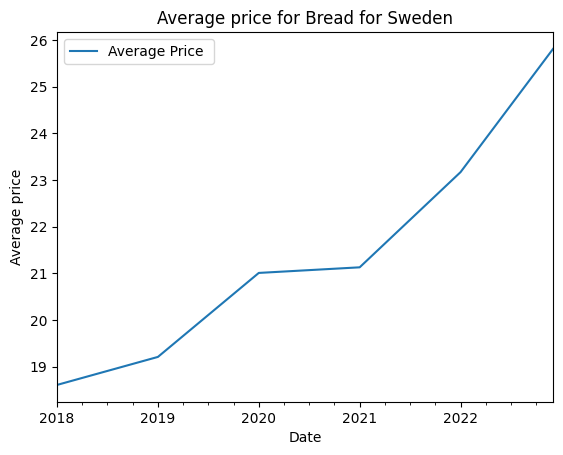

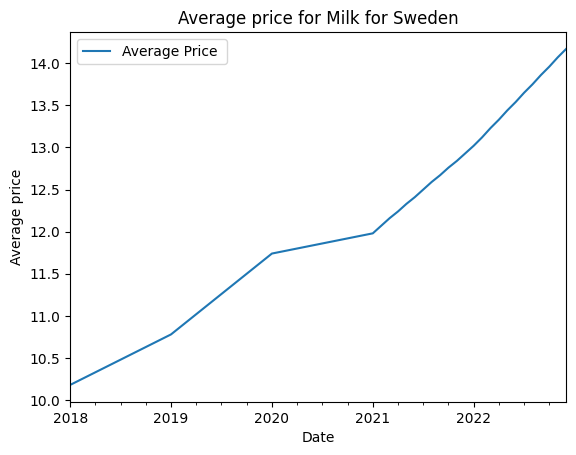

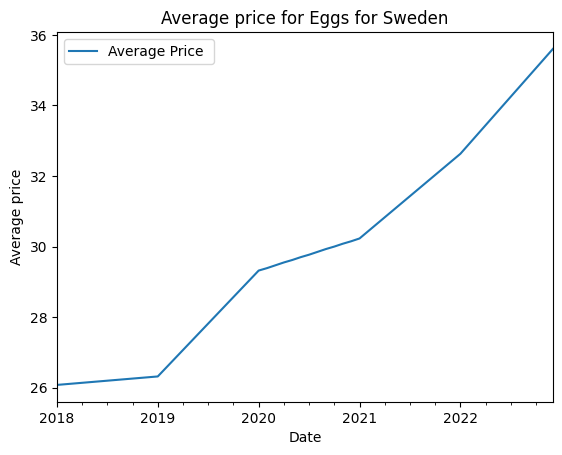

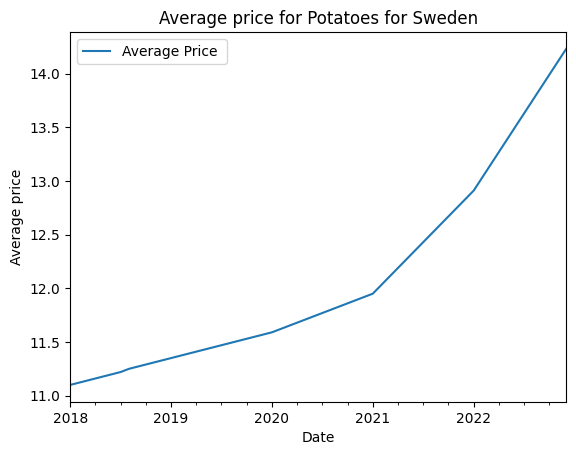

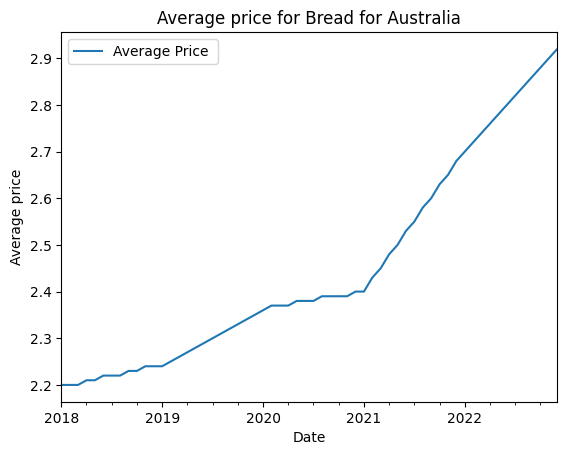

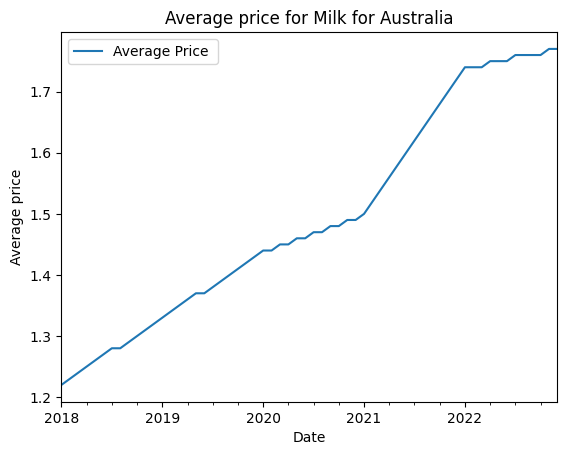

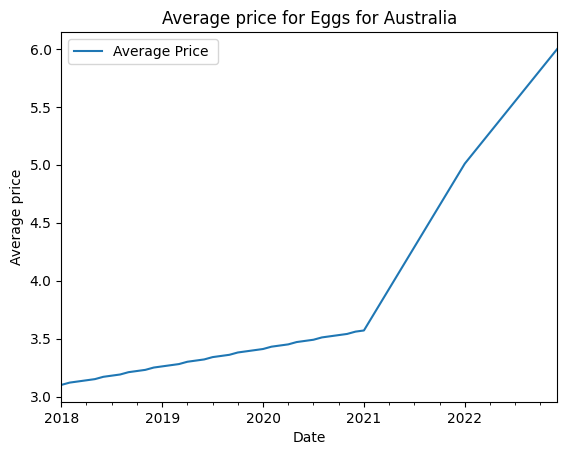

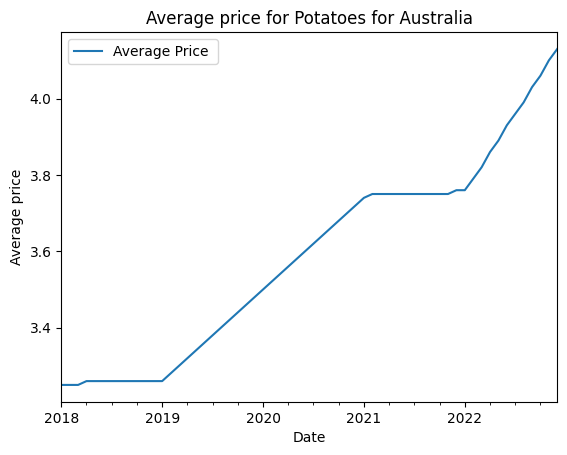

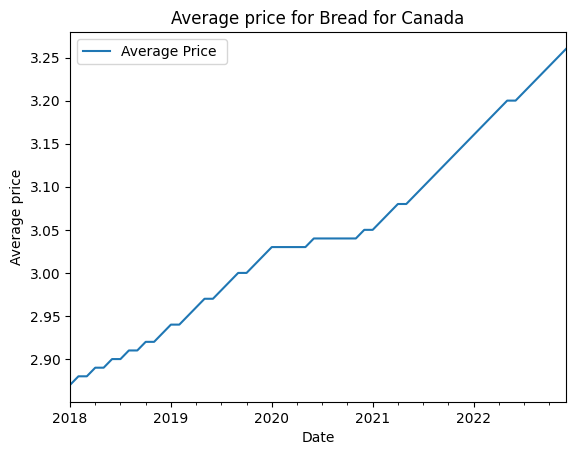

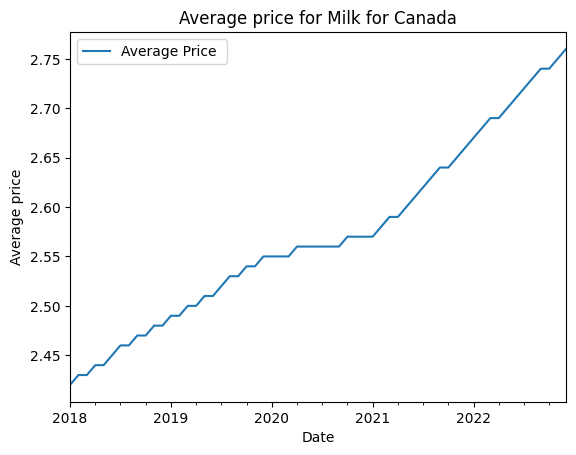

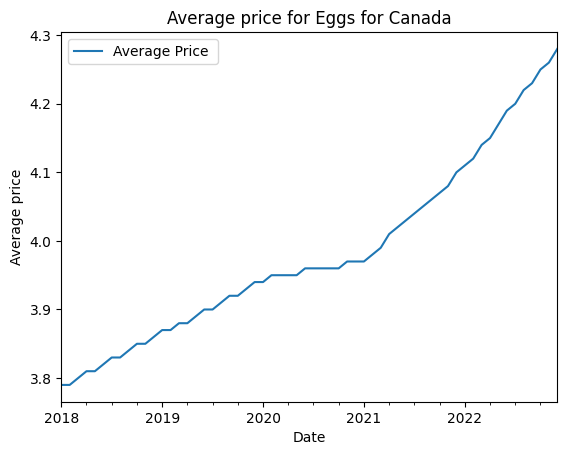

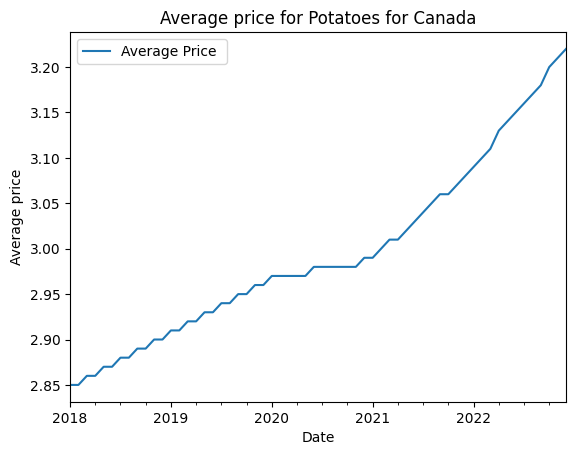

In [12]:
import matplotlib.pyplot as plt
# Line plot
for c in countries:
    for food in df['Food Item '].unique().tolist():
        df[(df['Country '] == c) & (df['Food Item '] == food)].plot(x='Date', y='Average Price ', kind='line')
        plt.title(f'Average price for {food} for {c}')
        plt.xlabel('Date')
        plt.ylabel('Average price')
        plt.show()

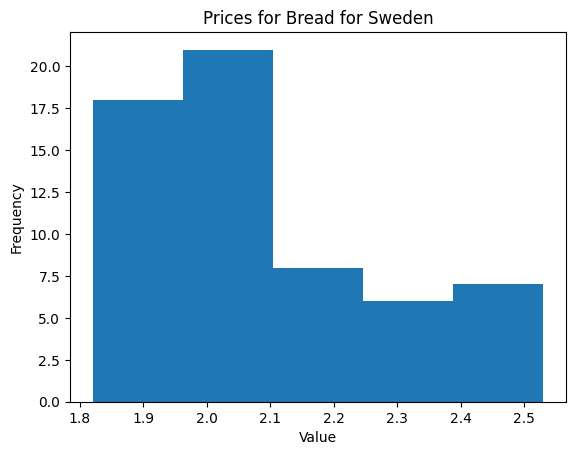

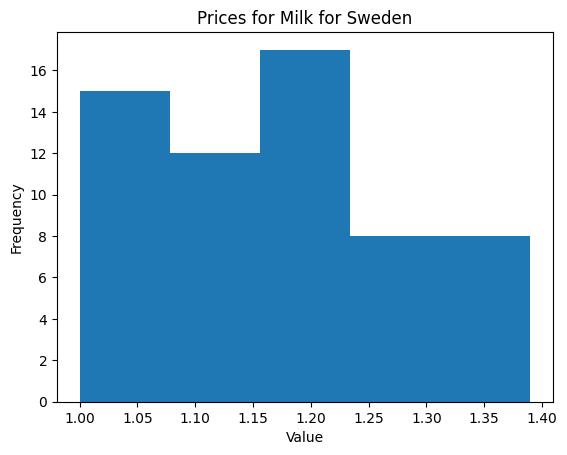

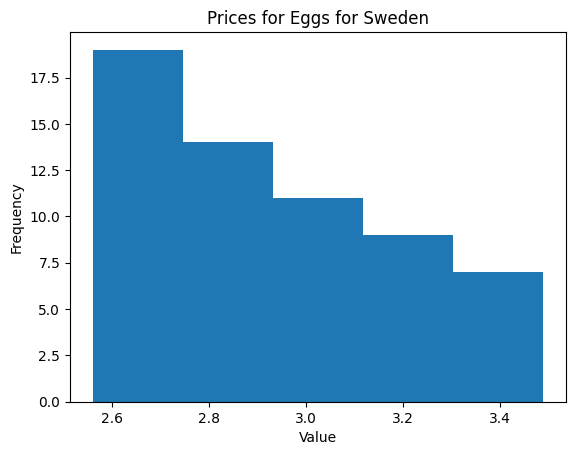

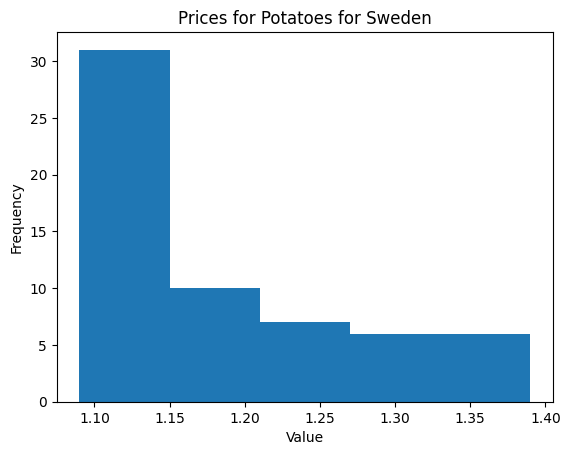

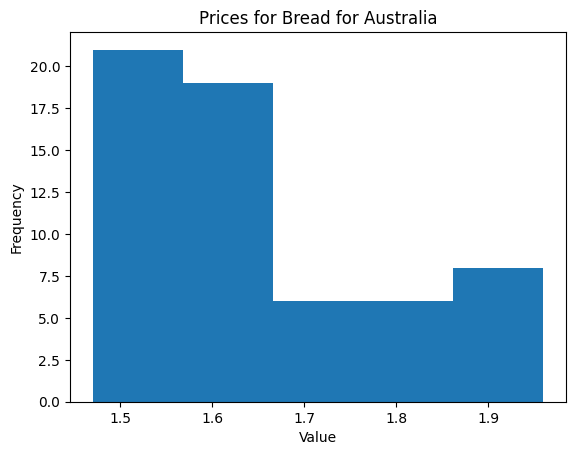

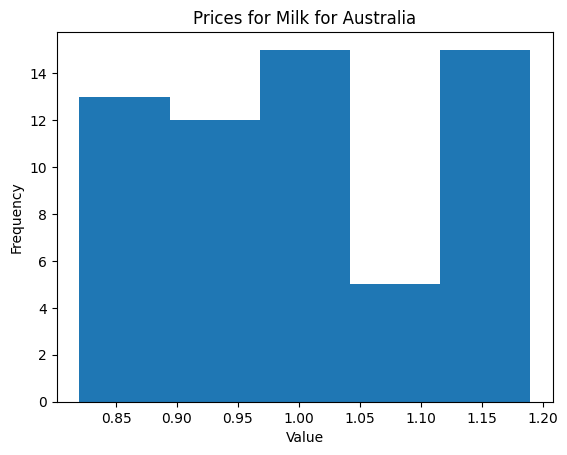

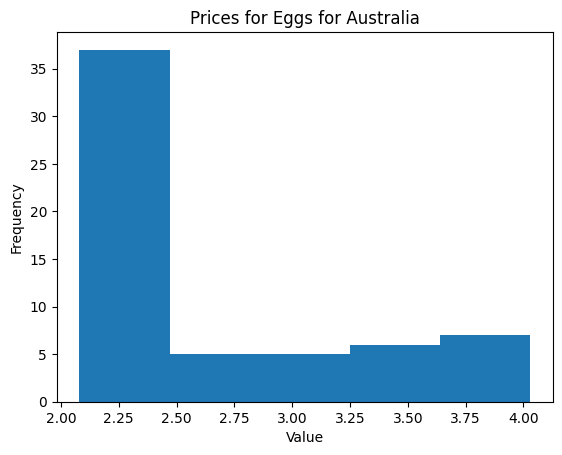

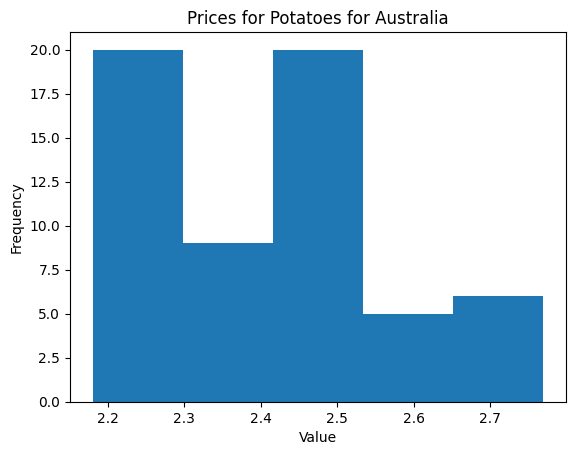

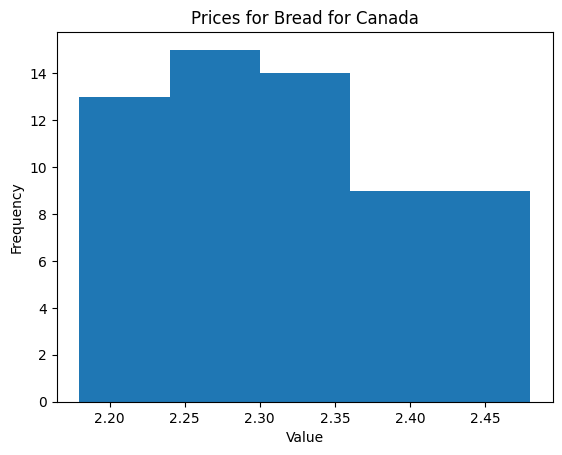

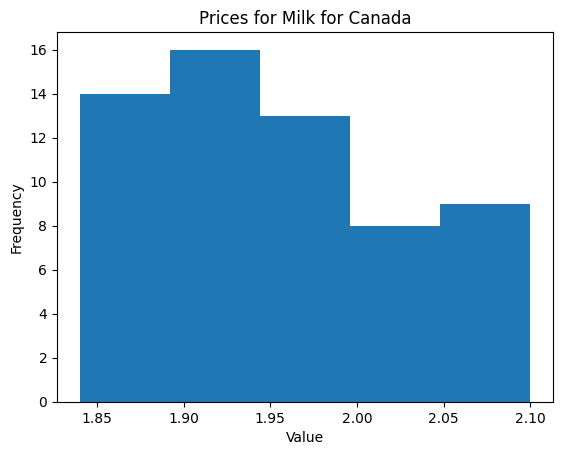

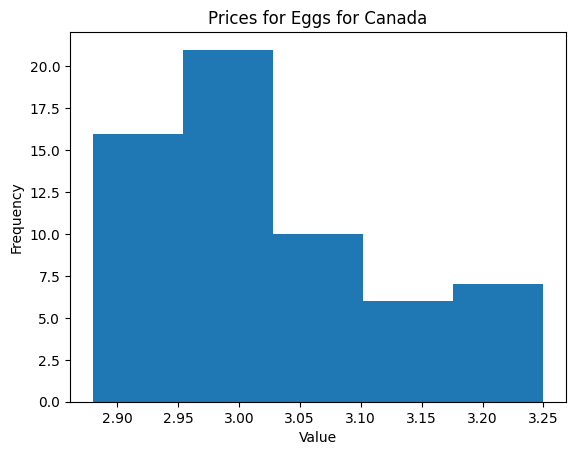

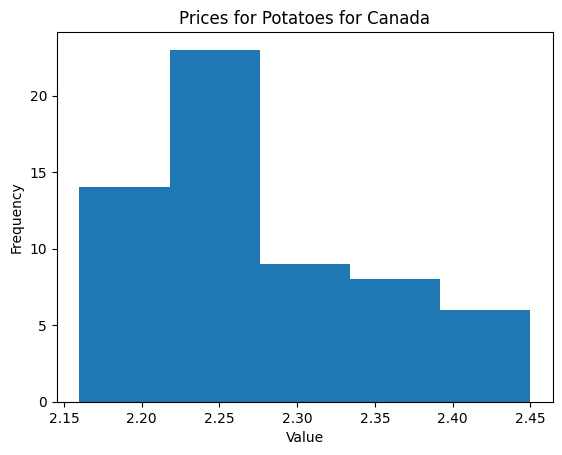

In [16]:
for c in countries:
    for food in df['Food Item '].unique().tolist():
        df[(df['Country '] == c) & (df['Food Item '] == food)]['Price in USD'].plot(kind='hist', bins=5)
        plt.title(f'Prices for {food} for {c}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

Визуелизација на годишните цени на млеко, леб, копмири и јајца за секоја држава. Ваквиот граф е најпрегледен бидејќи доколку гледавме на дневна база тогаш би имале 48 јазли за секој производ и не би можеле да видиме убаво.

Се прават јазли за одбраните држави и се поврзуваат со јазли за прозиводите. Производите ги прикажуваат цените на годишно ниво

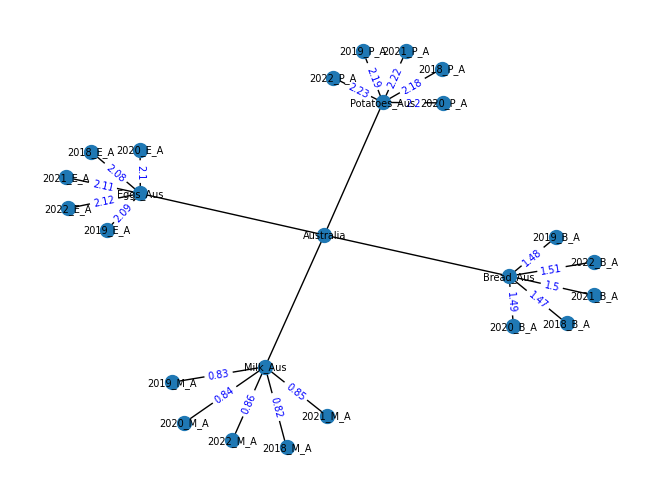

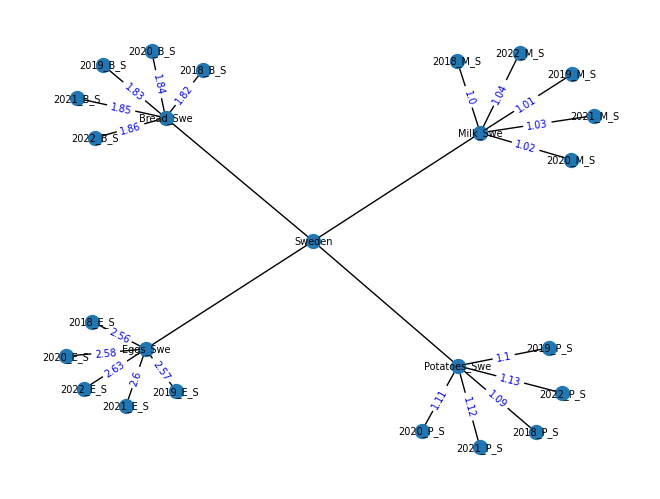

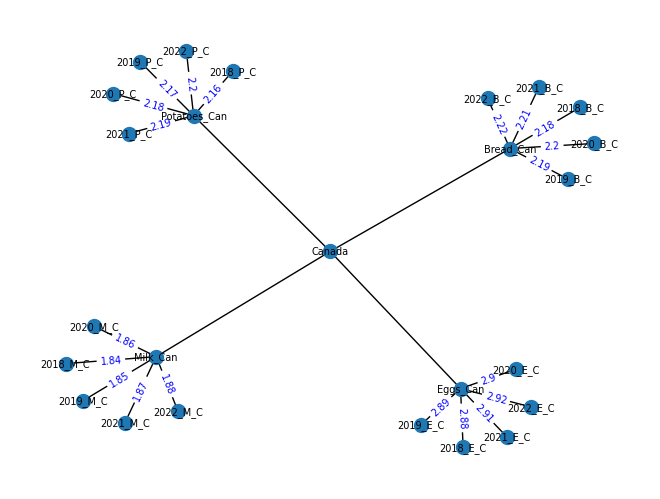

In [228]:
for country in df['Country '].unique().tolist():
    G = nx.Graph()

    food_items = df['Food Item '].unique()

    for food_item in food_items.tolist():
        G.add_node(f"{food_item}_{country[:3]}")
        G.add_edge(country, f"{food_item}_{country[:3]}")


    for food_item in food_items.tolist():
        for date, price in zip(df[(df['Country '] == country) & (df['Food Item '] == food_item)]['Date'].dt.year.unique(), df[(df['Country '] == country) & (df['Food Item '] == food_item)]['Price in USD'].unique()):
            G.add_node(f"{str(date)[:10]}_{food_item[:1]}_{country[:1]}")
            G.add_edge(f"{food_item}_{country[:3]}", f"{str(date)[:10]}_{food_item[:1]}_{country[:1]}", weight=price)

    pos = nx.fruchterman_reingold_layout(G, k=0.5, iterations=100)
    nx.draw(G, pos, with_labels=True, node_size=100, font_size=7, font_color='black')

    labels = nx.get_edge_attributes(G,'weight')
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=7, font_color='blue')
    plt.show()


NameError: name 'plt' is not defined

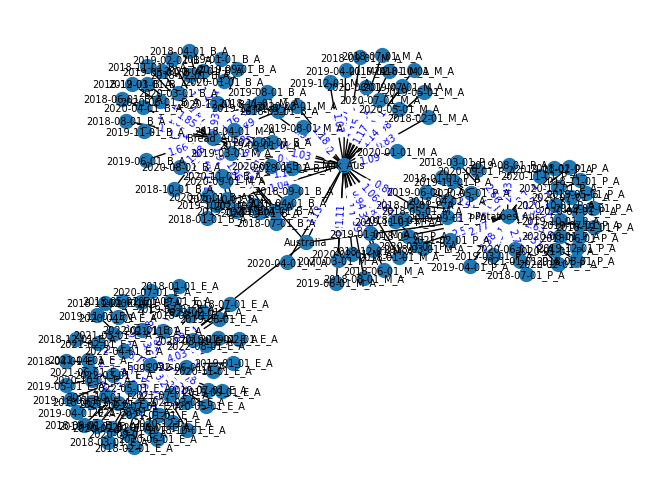

In [8]:
for country in df['Country '].unique().tolist():
    G = nx.Graph()

    food_items = df['Food Item '].unique()

    for food_item in food_items.tolist():
        G.add_node(f"{food_item}_{country[:3]}")
        G.add_edge(country, f"{food_item}_{country[:3]}")


    for food_item in food_items.tolist():
        for date, price in zip(df[(df['Country '] == country) & (df['Food Item '] == food_item)]['Date'].unique(), df[(df['Country '] == country) & (df['Food Item '] == food_item)]['Price in USD'].unique()):
            G.add_node(f"{str(date)[:10]}_{food_item[:1]}_{country[:1]}")
            G.add_edge(f"{food_item}_{country[:3]}", f"{str(date)[:10]}_{food_item[:1]}_{country[:1]}", weight=price)

    pos = nx.fruchterman_reingold_layout(G, k=0.5, iterations=100)
    nx.draw(G, pos, with_labels=True, node_size=100, font_size=7, font_color='black')

    labels = nx.get_edge_attributes(G,'weight')
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=7, font_color='blue')
    plt.show()
